In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize
from skimage.io import imread
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten

In [ ]:
os.listdir("/content/drive/MyDrive/luminar data/Deep Learing/Brain_Tumor/Training")

['glioma', 'notumor', 'meningioma', 'pituitary']

In [ ]:
os.listdir('/content/drive/MyDrive/luminar data/Deep Learing/Brain_Tumor/Testing')

['pituitary', 'notumor', 'meningioma', 'glioma']

In [ ]:
datadir="/content/drive/MyDrive/luminar data/Deep Learing/Brain_Tumor/Training"

In [ ]:
X_train=[]
y_train=[]
categories=['pituitary','notumor','meningioma','glioma']
for i in categories:
  path=os.path.join(datadir,i)
  # print(path)
  images=os.listdir(path)
  # print(images)
  print(i,":",len(images))
  for img in images:
    img_path=os.path.join(path,img)
    # print(img_path)
    img_arry=imread(img_path)
    # print(img_arry)
    img_resized=resize(img_arry,(150,150,1))
    X_train.append(img_resized)
    y_train.append(categories.index(i))
  print("Loaded Category: ",i)


pituitary : 1349
Loaded Category:  pituitary
notumor : 1604
Loaded Category:  notumor
meningioma : 1349
Loaded Category:  meningioma
glioma : 1297
Loaded Category:  glioma


In [ ]:
for i in categories:
  print(i,":",len(os.path.join(datadir,i)))

pituitary : 79
notumor : 77
meningioma : 80
glioma : 76


In [ ]:
print(len(X_train))

5599


In [ ]:
print(len(y_train))

5599


In [ ]:
datadir_test="/content/drive/MyDrive/luminar data/Deep Learing/Brain_Tumor/Testing"

In [ ]:
os.listdir("/content/drive/MyDrive/luminar data/Deep Learing/Brain_Tumor/Testing")

['pituitary', 'notumor', 'meningioma', 'glioma']

In [ ]:
X_test=[]
y_test=[]
categories_test=['pituitary','notumor','meningioma','glioma']
for i in categories_test:
  path=os.path.join(datadir_test,i)
  images=os.listdir(path)
  # print(path)
  print(i,":",len(images))
  for img in images:
    img_path=os.path.join(path,img)
    img_arry=imread(img_path)
    # print(img_arry)
    img_resized=resize(img_arry,(150,150,1))
    X_test.append(img_resized)
    y_test.append(categories.index(i))
  print("Loaded Category: ",i)

pituitary : 300
Loaded Category:  pituitary
notumor : 415
Loaded Category:  notumor
meningioma : 316
Loaded Category:  meningioma
glioma : 320
Loaded Category:  glioma


In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(5599, 150, 150, 1)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation="relu"))    #32,(3,3) same as (32,3)
model.add(MaxPool2D(2,2))                                                #(2,2) same as 2,(2,2)
model.add(Flatten())
model.add(Dense(10,activation="relu"))
model.add(Dense(4,activation="softmax"))

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit(X_train,y_train,batch_size=100,epochs=5)

Epoch 1/5
56/56 [==============================] - 49s 874ms/step - loss: 1.0718 - accuracy: 0.4778
Epoch 2/5
56/56 [==============================] - 55s 993ms/step - loss: 0.6864 - accuracy: 0.6983
Epoch 3/5
56/56 [==============================] - 52s 932ms/step - loss: 0.5095 - accuracy: 0.8201
Epoch 4/5
56/56 [==============================] - 52s 935ms/step - loss: 0.4075 - accuracy: 0.8598
Epoch 5/5
56/56 [==============================] - 52s 935ms/step - loss: 0.3454 - accuracy: 0.8830


In [ ]:
loss,accu=model.evaluate(X_test,y_test)
print("loss: ",loss)
print("accuracy: ",accu)

43/43 [==============================] - 3s 80ms/step - loss: 0.4274 - accuracy: 0.8268
loss:  0.4274293780326843
accuracy:  0.8267949819564819


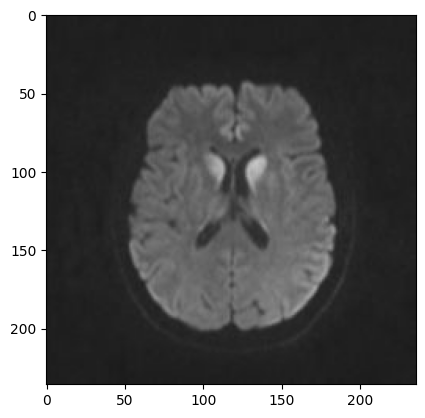

In [ ]:
img=imread("/content/drive/MyDrive/luminar data/Deep Learing/Brain_Tumor/Testing/notumor/Te-noTr_0007.jpg")
plt.imshow(img)

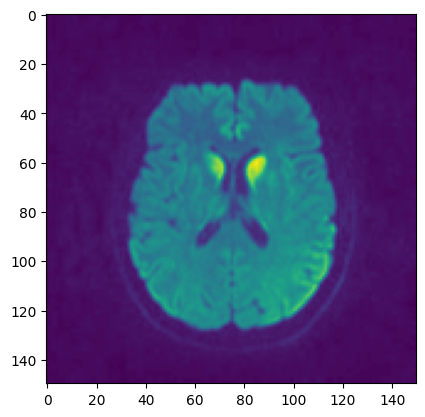

In [ ]:
img=resize(img,(150,150,1))
plt.imshow(img)
img_array=np.array(img)

In [ ]:
img_array.shape

(150, 150, 1)

In [ ]:
X_train.shape

(5599, 150, 150, 1)

In [ ]:
# resize
img_array=img_array.reshape(1,150,150,1)


In [ ]:
pred=model.predict(img_array)
print(pred)

1/1 [==============================] - 0s 84ms/step
[[2.1768893e-01 6.8510854e-01 9.7137786e-02 6.4680440e-05]]


In [ ]:
ind=pred.argmax()
print(ind)


1


In [ ]:

print(categories[ind])

notumor
